In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop
from keras.datasets import mnist
from keras.utils import np_utils

Using Theano backend.
WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu is not available  (error: Unable to get the number of gpus available: unknown error)


In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 100

## Load MNIST dataset

In [3]:
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = mnist.load_data()

### Reshape Data from image matrix to array & normalize


In [4]:
X_train = X_train_raw.reshape(X_train_raw.shape[0], X_train_raw.shape[1]*X_train_raw.shape[2]).astype('float32')
X_train /= 255.

X_test = X_test_raw.reshape(X_test_raw.shape[0], X_test_raw.shape[1]*X_test_raw.shape[2]).astype('float32')
X_test /= 255.

In [5]:
Y_train = np_utils.to_categorical(Y_train_raw)

Y_test = np_utils.to_categorical(Y_test_raw)

## Deep Multilayer Perceptron Model

In [6]:
model = Sequential()
model.add(Dense(output_dim=625, input_shape=(784,), init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim=625, input_shape=(625,), init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(output_dim=10, input_shape=(625,), init='normal'))
model.add(Activation('softmax'))
          
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 625)           490625      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 625)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 625)           0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 625)           391250      dropout_1[0][0]                  
___________________________________________________________________________________________

## Train

In [7]:
history = model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=batch_size, validation_split=0.15, verbose=0)

In [8]:
history.history

{'acc': [0.91264705884222885,
  0.96356862746033012,
  0.9750980392437355,
  0.98005882354811125,
  0.98294117648928769,
  0.98594117647993795,
  0.98754901961719288,
  0.98909803923438577,
  0.9892549019701341,
  0.99035294118582029,
  0.99154901960784314,
  0.99186274509803918,
  0.9925686274509804,
  0.99219607843137259,
  0.99299999999999999,
  0.99366666667601644,
  0.99398039215686274,
  0.99403921568627451,
  0.99407843137254903,
  0.9948039215686274,
  0.9945686274509804,
  0.99517647058823533,
  0.99543137254901959,
  0.99543137254901959,
  0.99515686274509807,
  0.99556862746033015,
  0.99529411764705877,
  0.99550980392156863,
  0.99607843137254903,
  0.99625490196078437,
  0.99588235295052618,
  0.99588235294117644,
  0.99621568627450985,
  0.99613725490196081,
  0.99617647058823533,
  0.99629411764705877,
  0.99670588235294122,
  0.99660784314660467,
  0.9966666666666667,
  0.99674509803921574,
  0.99678431372549015,
  0.99703921568627452,
  0.99649019607843137,
  0.996921

## Evaluate

In [9]:
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

 9984/10000 [============================>.] - ETA: 0sSummary: Loss over the test dataset: 0.19, Accuracy: 0.98


## Predict

In [10]:
test_predictions = model.predict(X_test)
test_prediction_ids = test_predictions.argmax(axis=1)

## Plot some predictions

In [11]:
from matplotlib import pyplot as plt
import numpy as np
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=6)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [12]:
n_view = 4

idx = np.random.permutation(range(0,len(X_test)))[:n_view]

imgs = X_test[idx,:].reshape(n_view, X_train_raw.shape[1], X_train_raw.shape[2])
titles = test_prediction_ids[idx]

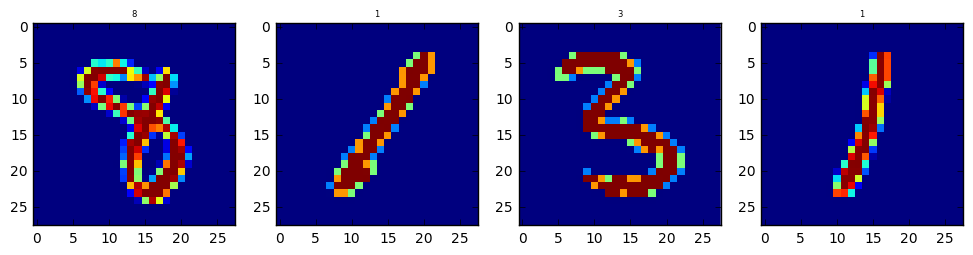

In [13]:
plots(imgs, titles=titles)
plt.show()

## Examine wrong predictions


In [14]:
# convert category vector into category label
Y_test_ids = Y_test.argmax(axis=1)

# compare the predicted and actual category labels to find error predictions
errors = np.array(Y_test_ids) - np.array(test_prediction_ids)

# gather all the wrong prediction indices
errors_idx = np.nonzero(errors)[0]

In [23]:
n_view = 4

random_idx = np.random.permutation(range(0,len(errors_idx)))[:n_view]

# grab a sampling of error indices 
random_errors_idx = errors_idx[random_idx]

# and prepare their images and labels
imgs = X_test[random_errors_idx,:].reshape(n_view, X_train_raw.shape[1], X_train_raw.shape[2])
titles = test_prediction_ids[random_errors_idx]

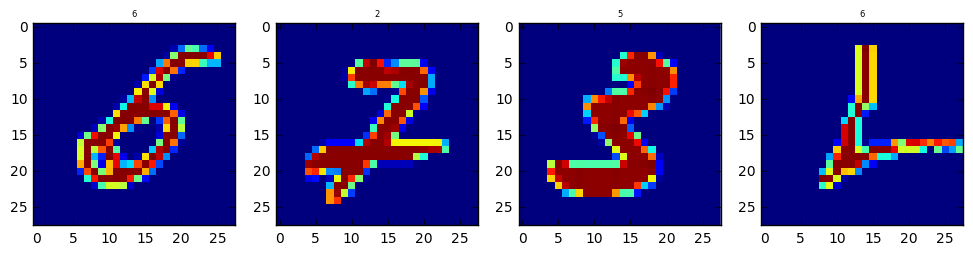

In [24]:
plots(imgs, titles=titles)
plt.show()

In [20]:
len(errors_idx) / 10000.


0.0162